In [4]:
from math import sin, cos, pi
from pylab import *
from lego_robot import *
import numpy as np

In [5]:
# This function takes the old (x, y, heading) pose and the motor ticks
# (ticks_left, ticks_right) and returns the new (x, y, heading).
def filter_step(old_pose, motor_ticks, ticks_to_mm, robot_width):
    
    x,y,theta = old_pose
    
    left_ticks  = motor_ticks[0]*ticks_to_mm
    right_ticks = motor_ticks[1]*ticks_to_mm
    
    # Find out if there is a turn at all.
    if motor_ticks[0] == motor_ticks[1]:
        # No turn. Just drive straight.

        # --->>> Implement your code to compute x, y, theta here.
      
        x = x + left_ticks*cos(theta)
        y = y + left_ticks*sin(theta)

        return (x, y, theta)

    else:
        # Turn. Compute alpha, R, etc.
               
        # --->>> Implement your code to compute x, y, theta here.
        
        alpha = (right_ticks-left_ticks)/robot_width
        bigR = left_ticks/alpha
        
        c_x,c_y = np.array([x,y])-(bigR+(robot_width/2))*np.array([sin(theta),-cos(theta)])
             
        theta_prime = (theta+alpha)%(2*pi)
        
        x_prime, y_prime = np.array([c_x,c_y])+(bigR+(robot_width/2))*np.array([sin(theta_prime),-cos(theta_prime)])
 
        return (x_prime, y_prime, theta_prime)

In [6]:
ticks_to_mm = 0.349

# Measured width of the robot (wheel gauge), in mm.
robot_width = 150.0

In [7]:
# Read data.
logfile = LegoLogfile()
logfile.read("robot4_motors.txt")

In [8]:
pose = (0.0, 0.0, 0.0)

In [9]:
# Loop over all motor tick records generate filtered position list.
filtered = []
for ticks in logfile.motor_ticks:
    pose = filter_step(pose, ticks, ticks_to_mm, robot_width)
    filtered.append(pose)

(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(0.0, 0.0, 0.0)
(24.779, 0.0, 0.0)
(69.102, 0.0, 0.0)
(113.94845953817779, -0.052171404797263676, 6.280858640512919)
(158.9693376803923, -0.15692017028978156, 6.280858640512919)
(158.9693376803923, -0.15692017028978156, 6.280858640512919)
(203.6412167672408, -0.26085692984824893, 6.280858640512919)
(248.48767630541857, -0.31302833464724245, 0.0)
(293.33413584359636, -0.3651997394445061, 6.280858640512919)
(338.18059538177414, -0.4173711442417698, 0.0)
(338.18059538177414, -0.4173711442417698, 0.0)
(383.0270549199519, -0.4695425490390335, 6.280858640512919)
(427.8735144581297, -0.5217139538362972, 0.0)
(427.8735144581297, -0.5217139538362972, 0.0)
(472.7199739963075, -0.5738853586335608, 6.280858640512919)
(517.5664335344852, -0.6260567634308245, 0.0)
(562.412893072663, -0.6782281682280882, 6.28085

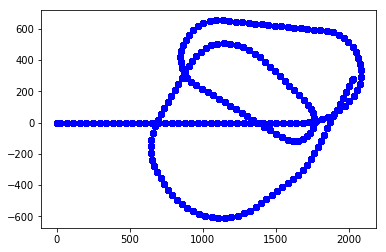

In [10]:
# Draw result.
for pose in filtered:
    print (pose)
    plot([p[0] for p in filtered], [p[1] for p in filtered], 'bo')
show()